# Data explore

Explore data table from SWRpipeline_AllSessions.m

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)


%config InlineBackend.figure_format = 'retina'

In [182]:
df = pd.read_csv(r'D:\projects\ripple_heterogeneity\df.csv')
df.cellType = df.cellType.str.lower()
df

,particip,FRall,FRparticip,nSpkAll,nSpkParticip,cellType,region,CA1depth,UID,burstIndex_Royer2012,animal,day,opto,task,novel,epoch,ca1_layer
0,0.013629,0.085265,6.284407,0.013629,1.000000,narrow interneuron,CA1,3.0,1,0.000000,AB1,day1,none,linear,familiar_env,pre,deep
1,0.025554,0.191845,7.247999,0.030664,1.200000,pyramidal cell,CA1,-4.0,2,0.000000,AB1,day1,none,linear,familiar_env,pre,sup
2,0.112436,0.767381,6.619818,0.122658,1.090909,narrow interneuron,CA1,-11.0,3,0.826176,AB1,day1,none,linear,familiar_env,pre,sup
3,0.023850,0.149213,6.212536,0.023850,1.000000,narrow interneuron,CA1,-8.0,4,0.000000,AB1,day1,none,linear,familiar_env,pre,sup
4,0.017036,0.106581,6.156583,0.017036,1.000000,narrow interneuron,CA3,-19.0,5,2.404762,AB1,day1,none,linear,familiar_env,pre,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23579,0.099761,1.047827,10.450723,0.161213,1.616000,narrow interneuron,DGe,-1.0,58,24.073117,Kenji,ec013.895_902,none,Mwheel,familiar_env,post,unknown
23580,0.125299,0.881834,6.921808,0.135674,1.082803,narrow interneuron,unknown,-1.0,59,0.154081,Kenji,ec013.895_902,none,Mwheel,familiar_env,post,unknown
23581,0.003192,0.020749,7.240051,0.003192,1.000000,narrow interneuron,DGe,-1.0,60,11.745292,Kenji,ec013.895_902,none,Mwheel,familiar_env,post,unknown
23582,0.189146,1.831103,9.814445,0.281724,1.489451,pyramidal cell,unknown,-1.0,61,1.737318,Kenji,ec013.895_902,none,Mwheel,familiar_env,post,unknown


## right now, lets just make lr CA1 into CA1

In [183]:
print(df.region.unique())
df.loc[(df.region=="lCA1") | (df.region=="rCA1"),'region'] = "CA1"


['CA1' 'CA3' 'Unknown' 'DG' 'CA2' 'MEC' 'CA3DG' 'NCX' 'DGCA3' 'PFC' 'lCA1'
 'rCA1' 'EC2p' 'unknown' 'EC2i' 'EC3p' 'DGi' 'DGe']


## Unique elements in data frame

In [184]:
print(len(df.animal.unique()),' animals')
# print(df[df.epoch=='task'].animal.value_counts())
print(df.animal.unique())

print('')
df['animal_session'] = df.animal+df.day
print(len(df.animal_session.unique()),' individual sessions')
# print(df.animal_session.unique())

print('')
print(sum(df.epoch == "task"),' units during some type of task')

print('')
print(df[df.epoch=='task'].cellType.value_counts())

print('')
print(df[df.epoch=='task'].task.value_counts())

print('')
print(df.epoch.value_counts())

25  animals
['AB1' 'AB3' 'AB4' 'AYA6' 'AYA7' 'AYA9' 'AYA10' 'OML5' 'OML3' 'OML7'
 'OML8' 'OML10' 'OML18' 'OML19' 'Wmaze2\\OR15' 'Wmaze2\\OR18'
 'Wmaze3\\OR22' 'Wmaze3\\OR21' 'Wmaze3\\OR23' 'GrosmarkAD\\Cicero'
 'GrosmarkAD\\Buddy' 'GrosmarkAD\\Achilles' 'GrosmarkAD\\Gatsby' 'Kenji'
 'AYA4']

96  individual sessions

8767  units during some type of task

pyramidal cell        6885
narrow interneuron    1098
unknown                749
wide interneuron        35
Name: cellType, dtype: int64

cheesboard    3502
linear        3015
w_maze        1510
t_maze         678
Mwheel          62
Name: task, dtype: int64

task    8767
post    7452
pre     7365
Name: epoch, dtype: int64


### There does not seem to be any obvious differences between epochs (pre/task/post)

In [ ]:
sns.pairplot(
        df[(df.region=='CA1') & (df.cellType=="Pyramidal Cell")],
        hue="epoch",
        vars=['particip','FRall','FRparticip','nSpkAll','nSpkParticip','burstIndex_Royer2012','CA1depth'],
        corner=True) 

### Because of the lack of differences in epoch, lets look at between ca1 cell layers (deep/mid/sup)

In [ ]:
sns.pairplot(
    df[(df.epoch=='task') & (df.region=='CA1') & (df.cellType=="Pyramidal Cell")],
    hue="ca1_layer",
    vars=['particip','FRall','FRparticip','nSpkAll','nSpkParticip','burstIndex_Royer2012','CA1depth'],
    corner=True)


### there should be difference in fr and participation between the cell types

In [ ]:
sns.pairplot(
    df[(df.epoch=='task') & (df.region=='CA1')],
    hue="cellType",
    vars=['particip','FRall','FRparticip','nSpkAll','nSpkParticip','burstIndex_Royer2012','CA1depth'],
    corner=True)


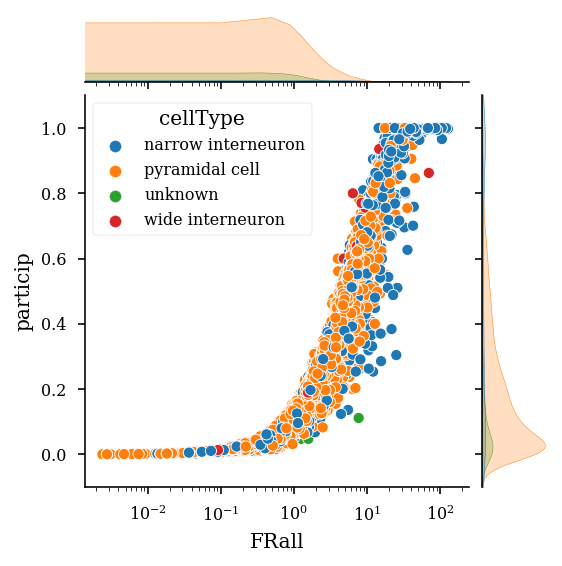

In [186]:
# f, ax = plt.subplots(figsize=(7, 7))

g = sns.jointplot(x="FRall",
                    y="particip",
                    hue="cellType",
                    data=df[df.epoch=="task"],
                    ylim=(-0.1, 1.1),
                    height=4,
                    alpha=1)
ax = g.ax_joint
ax.set_xscale('log')
g.ax_marg_x.set_xscale('log')



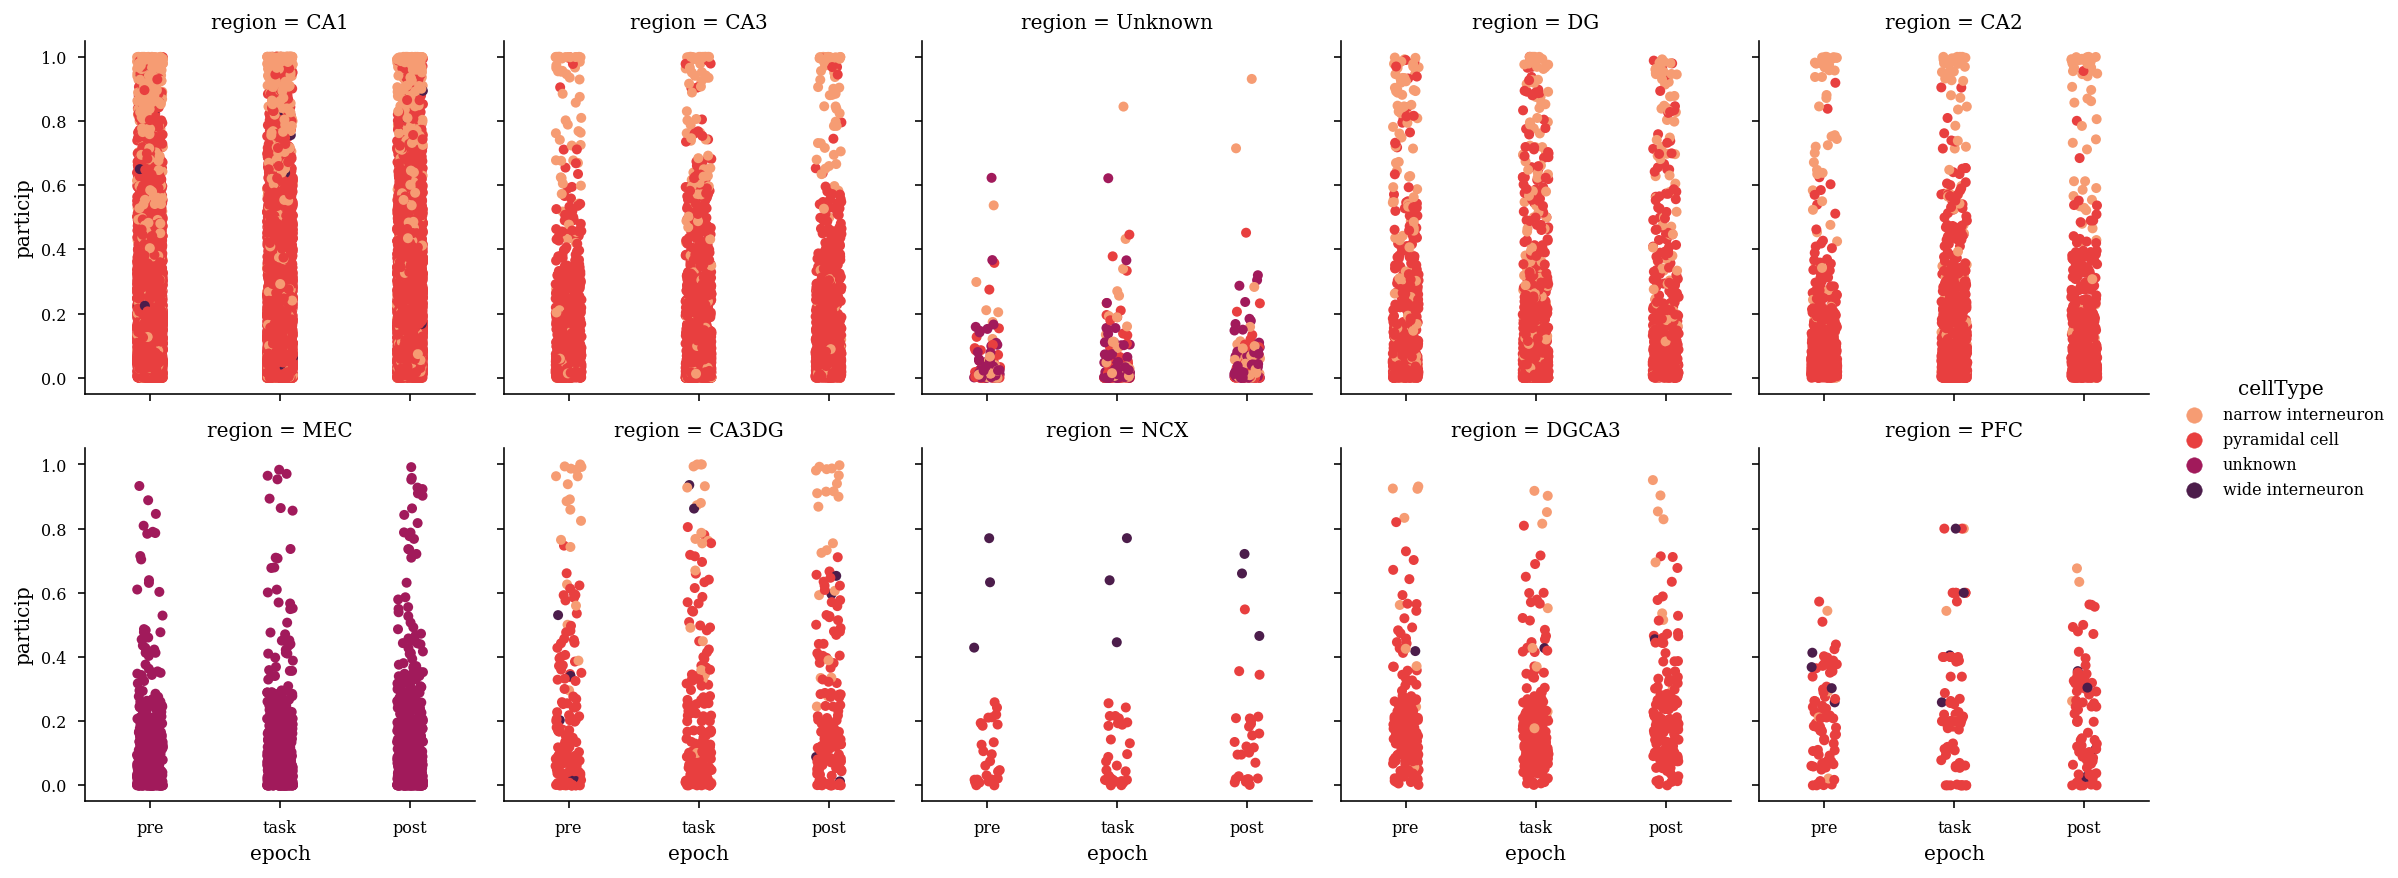

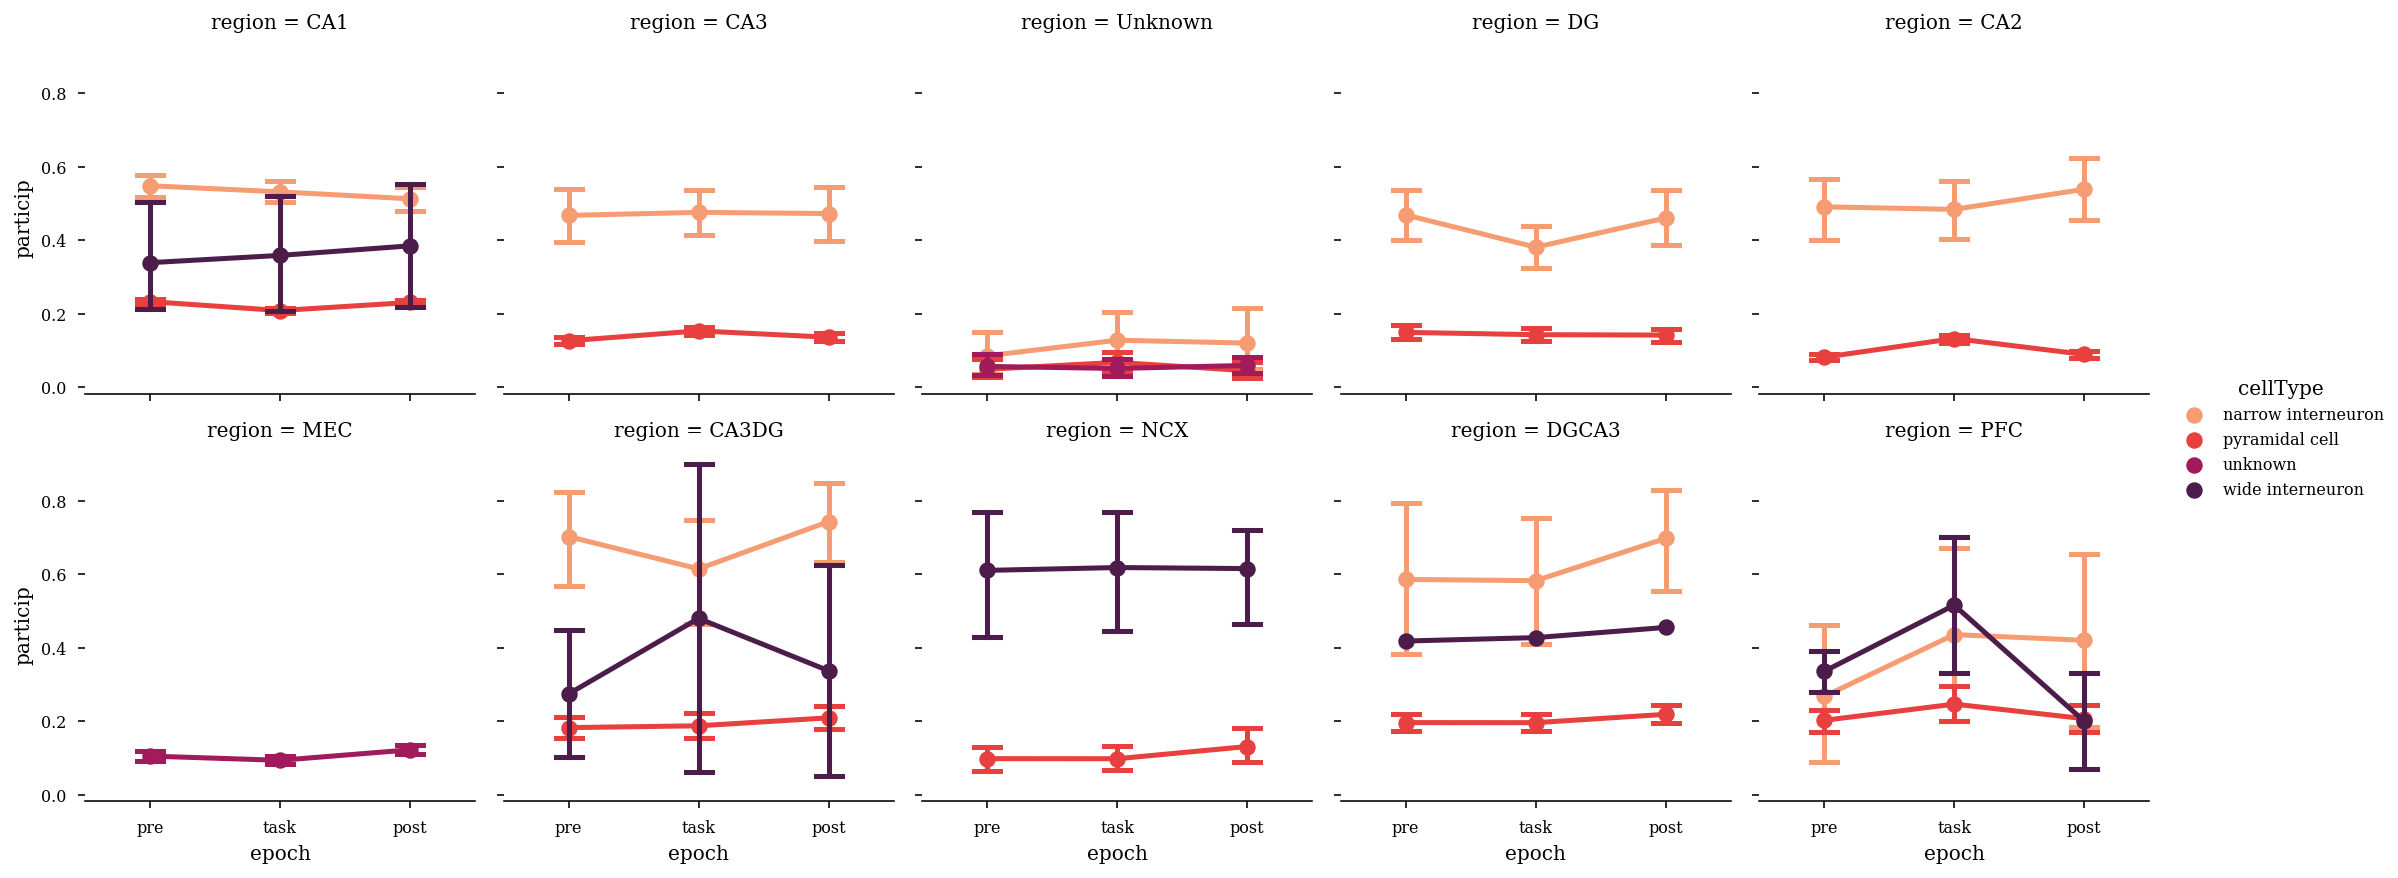

In [108]:
g = sns.catplot(x="epoch", y="particip",
                hue="cellType", col="region",col_wrap=5,
                data=df, kind="strip",
                 height=3, aspect=1,palette="rocket_r")
                 
g = sns.catplot(x="epoch", y="particip", hue="cellType",col='region',col_wrap=5,
                capsize=.2, palette="rocket_r", height=3, aspect=1,
                kind="point", data=df)
g.despine(left=True)

In [ ]:
# sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(9, 4))
# ax.set_yscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="cellType", y="particip", data=df[(df.region=='CA1')],
            whis=[0, 100], width=.6, palette="vlag",saturation=1)

# Add in points to show each observation
sns.stripplot(x="cellType", y="particip", data=df[(df.region=='CA1')],
              size=1, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
f, ax = plt.subplots(figsize=(9, 4))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')], x="cellType", y="particip", hue="epoch",
               split=True, inner="quart", linewidth=1,
               palette={"pre": "b", "post": ".85"})

f, ax = plt.subplots(figsize=(9, 4))
# sns.boxplot(x="cellType", y="particip",
#             hue="epoch", palette=["m", "g"],
#             data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')])

sns.stripplot(x="cellType", y="particip",hue="epoch", data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')],
              size=4,  palette=["m", "g"], linewidth=0)